# Final Project - DATA620 Web Analytics
Daniel Dittenhafer & Justin Hink

## References

Here we load the required references including networkX version 1.11.

In [2]:
import csv

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

import networkx as nx
import networkx_helpers as nxh
nx.__version__

'1.11'

## Load Data Set

Here we load the basic data set of cabinet positions and the related nominee information.

In [52]:
imageDest = "../images/"
graphmlDest = "../data/"
dataFile = "../data/TrumpCabinet.csv"
dataset = []
with open( dataFile, "rb" ) as theFile:
    reader = csv.DictReader( theFile )
    for line in reader:
        dataset.append(line)

In [53]:
# Show an example of the loaded data
dataset[1]

{'Cabinet Seat': 'Secretary of Defense',
 'CampaignPosition': '',
 'Citation': '',
 'OrgType': 'Military',
 'Organization': 'U.S. Central Command',
 'PastTrump': '',
 'Person': 'James Mattis',
 'Prior Position': 'General',
 'Wikipedia': 'https://en.wikipedia.org/wiki/James_Mattis',
 'Wikipedia Org': 'https://en.wikipedia.org/wiki/United_States_Central_Command'}

## Graph Construction

In the section, we convert the raw data into edge sets associated with various graph instances.

In [54]:
def makeGraph(data, src, dest, gx=None):
    """Helper function to construct the graph with node types included."""
    if gx is None:
        gx = nx.Graph()
        
    nodeTypes = {}
    for i in data:
        
        if len(i[src]) > 0 and len(i[dest]) > 0:
            gx.add_edge(i[src],i[dest])
            nodeTypes[i[src]] = src
            nodeTypes[i[dest]] = dest
        else:
            print src, ":", i[src]
            print dest, ":", i[dest]
            
    nx.set_node_attributes (gx, "NodeType", nodeTypes)
    
    return gx

In [55]:
people = []
for i in dataset:
    people.append(i["Person"])
    


gxOrgType = makeGraph(dataset, "Person", "OrgType")

gxPriorPosition = makeGraph(dataset, "Person", "Prior Position")

gxOrganization = makeGraph(dataset, "Person", "Organization")

gxCombined = makeGraph(dataset, "Person", "Organization")
gxCombined = makeGraph(dataset, "Person", "OrgType", gx=gxCombined)
gxCombined = makeGraph(dataset, "Person", "Prior Position", gx=gxCombined)

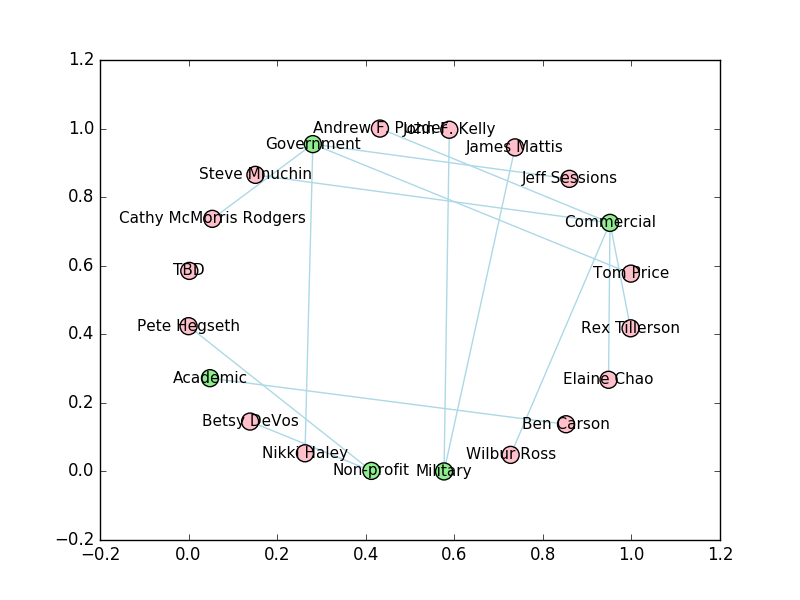

In [56]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-OrgTypeGraph.png"
nx.write_graphml(gxOrgType, "../data/OrgTypeGraph.graphml")
nxh.renderGraph(gxOrgType, graphFile, False, top=people)

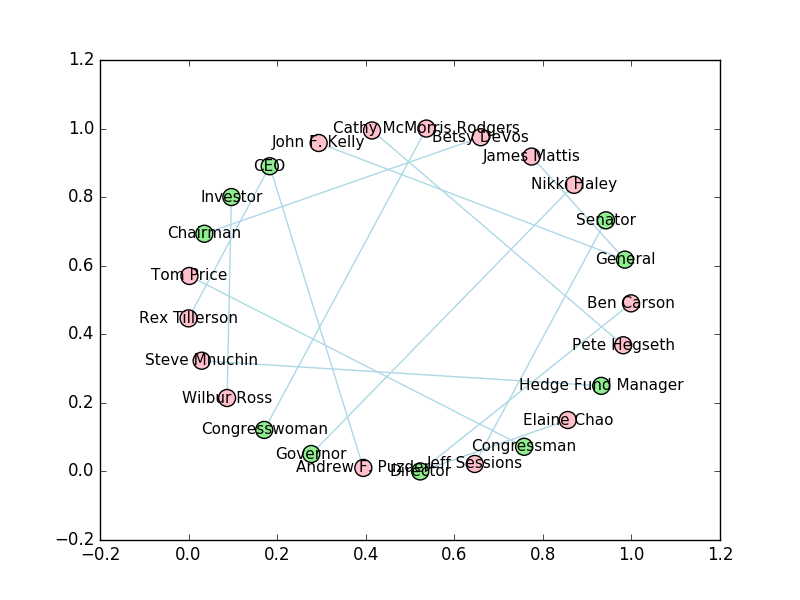

In [15]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-PriorPositionGraph.png"
nx.write_graphml(gxPriorPosition, "../data/PriorPositionGraph.graphml")
nxh.renderGraph(gxPriorPosition, graphFile, False, top=people)

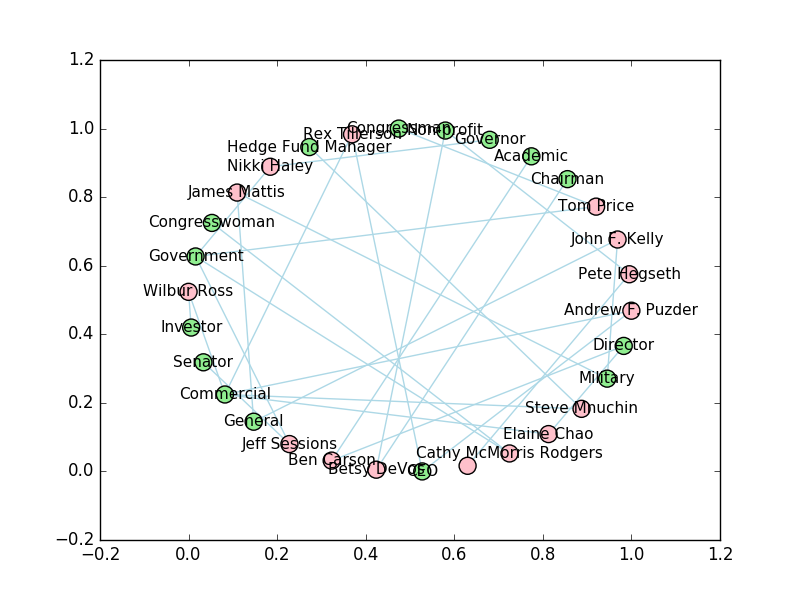

In [16]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-CombinedGraph.png"
nx.write_graphml(gxCombined, "../data/CombinedGraph.graphml")
nxh.renderGraph(gxCombined, graphFile, False, top=people)

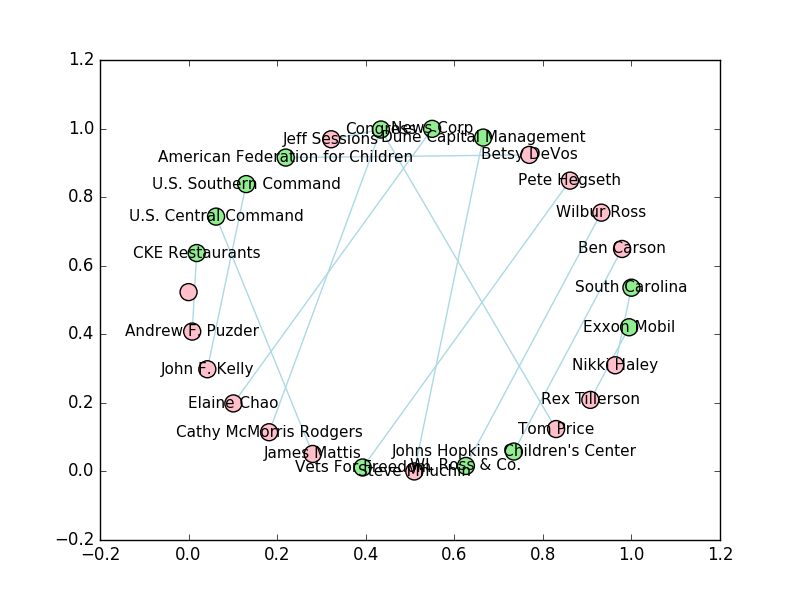

In [17]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-OrgGraph.png"
nx.write_graphml(gxOrganization, "../data/OrgGraph.graphml")
nxh.renderGraph(gxOrganization, graphFile, False, top=people)